In [45]:
import yfinance as yf

btc = yf.download("BTC-USD", start="2025-05-06", end="2025-08-06", interval="1h")
eth = yf.download("ETH-USD", start="2025-05-06", end="2025-08-06", interval="1h")
print(btc.head(24))

/var/folders/tx/w6h_l95x6612vyhm8b7dd5tm0000gn/T/ipykernel_66570/1001935524.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2025-05-06", end="2025-08-06", interval="1h")
[*********************100%***********************]  1 of 1 completed
/var/folders/tx/w6h_l95x6612vyhm8b7dd5tm0000gn/T/ipykernel_66570/1001935524.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth = yf.download("ETH-USD", start="2025-05-06", end="2025-08-06", interval="1h")
[*********************100%***********************]  1 of 1 completed

Price                             Close          High           Low  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2025-05-06 00:00:00+00:00  94566.031250  94746.039062  94439.132812   
2025-05-06 01:00:00+00:00  94352.171875  94897.062500  94335.750000   
2025-05-06 02:00:00+00:00  94297.109375  94385.757812  94056.015625   
2025-05-06 03:00:00+00:00  94459.703125  94493.421875  94259.250000   
2025-05-06 04:00:00+00:00  94552.625000  94574.085938  94378.265625   
2025-05-06 05:00:00+00:00  94321.640625  94589.593750  94321.640625   
2025-05-06 06:00:00+00:00  94446.531250  94462.273438  94334.609375   
2025-05-06 07:00:00+00:00  94414.460938  94598.445312  94374.289062   
2025-05-06 08:00:00+00:00  94312.062500  94391.218750  94024.898438   
2025-05-06 09:00:00+00:00  94186.250000  94353.210938  94104.757812   
2025-05-06 10:00:00+00:00  93908.148438  94297.390625  93876.210938   
2025-0

OK: (2208, 6) (2208, 6)


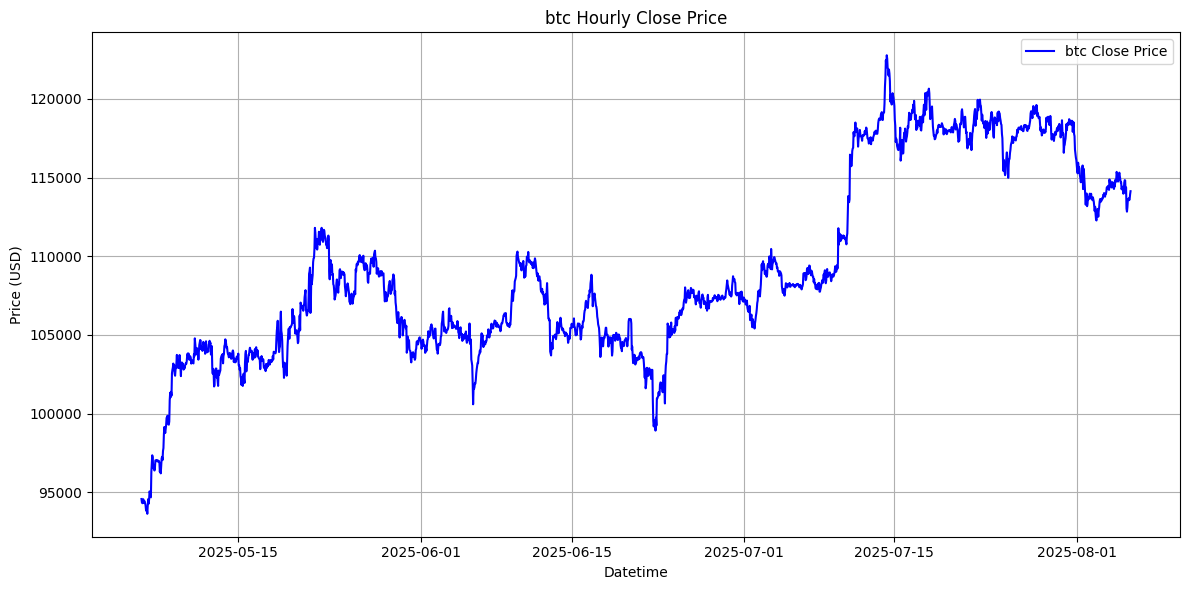

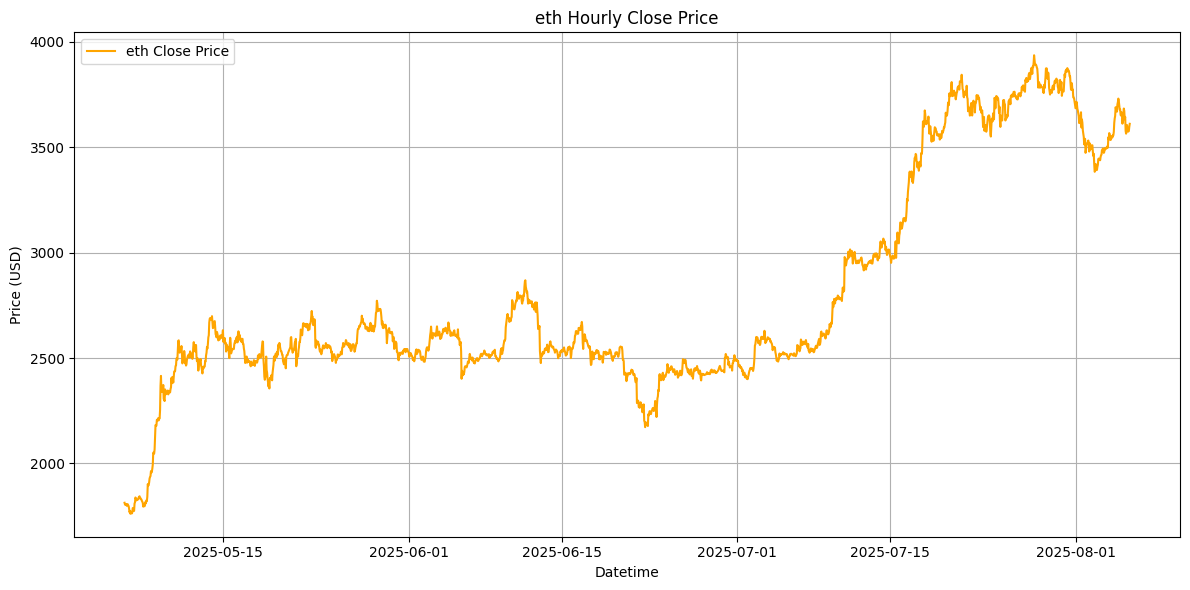

In [46]:
import pandas as pd

btc = btc.reset_index()
btc['Datetime'] = pd.to_datetime(btc['Datetime'])

eth = eth.reset_index()
eth['Datetime'] = pd.to_datetime(eth['Datetime'])

btc.to_csv("BTC_1m_hourly.csv", index=False)
eth.to_csv("ETH_1m_hourly.csv", index=False)


print("OK:", btc.shape, eth.shape)

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(btc['Datetime'], btc['Close'], label='btc Close Price', color='blue')

plt.title('btc Hourly Close Price')
plt.xlabel('Datetime')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(eth['Datetime'], eth['Close'], label='eth Close Price', color='orange')
plt.title('eth Hourly Close Price')
plt.xlabel('Datetime')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd
import numpy as np


# 假设 eth 是 Series（价格列）
# 转成一维 numpy 数组

eth_nonlag = eth[2:]     # t
eth_lag1   = eth[1:-1]   # t-1
eth_lag2   = eth[0:-2]  # t-2

btc_nolag = btc[2:]
btc_lag1   = btc[1:-1]
btc_lag2   = btc[0:-2]


# eth loc close price
Eth_y_t = eth_nonlag['Close'].values
Eth_y_t_1 = eth_lag1['Close'].values
Eth_y_t_2 = eth_lag2['Close'].values

# btc loc close price
Btc_y_t = btc_nolag['Close'].values
Btc_y_t_1 = btc_lag1['Close'].values
Btc_y_t_2 = btc_lag2['Close'].values

# matrix A
A = np.hstack([Eth_y_t_1/1000, Eth_y_t_2/1000, Btc_y_t_1/100000, Btc_y_t_2/100000]).astype(float)
y = Eth_y_t.astype(float) / 1000

print("A shape:", A.shape, " y shape:", y.shape)


A shape: (2206, 4)  y shape: (2206, 1)


[9.500256886872844, 18.12939549792463, 26.942823599271396, 35.956592237249666, 45.119921486684355, 54.46220563821986, 64.02857108620475, 73.76840557005292, 83.66293563493159, 93.68075215248429, 103.76291942253755, 114.00521150897096, 124.42034794807589, 135.02506582887264, 145.91499153269382, 156.99803932195618, 168.29258104680383, 179.96931157058845, 191.99118857118674, 204.17376104420148, 216.53941520351066, 229.3998606740179, 242.8243186257526, 256.7234084336387, 271.01723158023094, 285.48896858557634, 300.20077351826, 315.23490601133676, 330.5841757310958, 346.2623090613212, 362.35357870038865, 378.86422754500506, 395.75083544719234, 412.92950108736096, 430.40166212499855, 448.2009894382481, 466.31334432150067, 484.7301276838668, 503.435841993687, 522.4418632401485, 541.609623822976, 561.0988245158804, 581.0006066795365, 601.2206669992843, 621.9685991413344, 643.3403754432708, 665.231490031391, 687.6557525818188, 710.6761255184014, 734.3929056991245, 759.3950857126566, 785.59343008

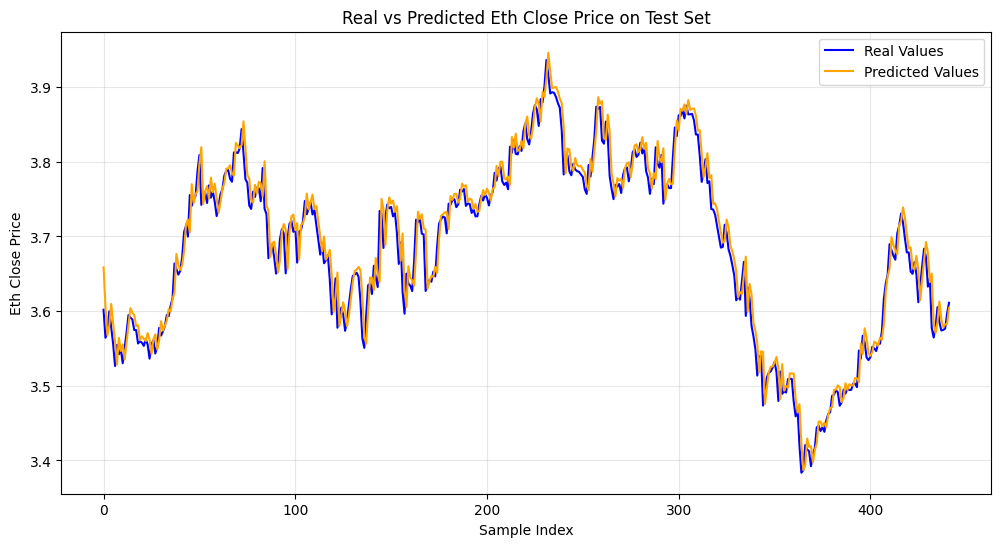

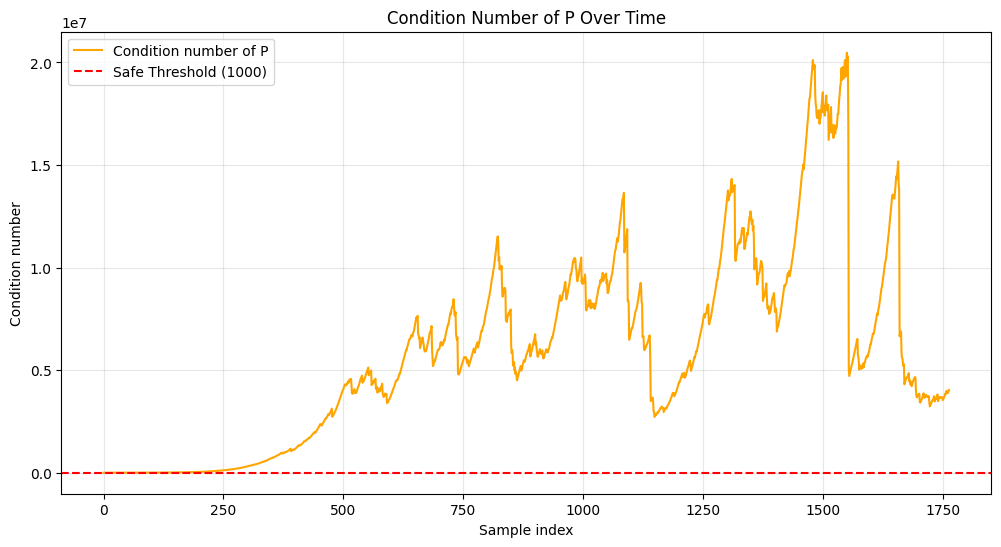

First point where condition number exceeds 1000: Index 59, Condition Number 1022.45
Datetime of first exceed: 2025-07-20 23:00:00+00:00


In [53]:

# WEIGHT RLS

# ---- 1) 切分 80% / 20% ----
n = A.shape[0]
split_idx = int(n * 0.8)
A_train, A_test = A[:split_idx], A[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# ---- 2) 初始化参数 ----
beta = 0.98
P = np.identity(A.shape[1])
theta = np.zeros((A.shape[1], 1))
cond_P = []

# ---- 3) 在训练集上递推更新 theta ----
for row, y_t in zip(A_train, y_train.flatten()):
    row = row.reshape(-1, 1)
    newsample = row @ row.T
    theta = theta + (P @ row) * (y_t - row.T @ theta) / (beta + row.T @ P @ row)
    P = 1/beta * (P - (P @ newsample @ P) / (beta + row.T @ P @ row))
    cond_num = np.linalg.cond(P)
    cond_P.append(cond_num)
y_pred_test = A_test @ theta

print(cond_P)

# ---- 5) 对比预测值和真实值 ----
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"MSE: {mse:.4f}")
print(f"R² : {r2:.4f}")

# Plot real vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Real Values', color='blue')
plt.plot(y_pred_test, label='Predicted Values', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Eth Close Price')
plt.title('Real vs Predicted Eth Close Price on Test Set')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# plot condition number
plt.figure(figsize=(12, 6))
plt.plot(cond_P, label="Condition number of P", color='orange')
plt.xlabel("Sample index")
plt.ylabel("Condition number")
plt.axhline(y=1000, color='red', linestyle='--', label='Safe Threshold (1000)')
plt.legend()
plt.title("Condition Number of P Over Time")
plt.grid(True, alpha=0.3)
plt.show()

# show first point the condition number exceeds 1000
exceed_idx = np.where(np.array(cond_P) > 1000)[0][0]
print(f"First point where condition number exceeds 1000: Index {exceed_idx}, Condition Number {cond_P[exceed_idx]:.2f}")
# index 59 for which datetime
print(f"Datetime of first exceed: {btc['Datetime'].iloc[split_idx + exceed_idx]}")

RMSE: 0.0286
R² : 0.9416


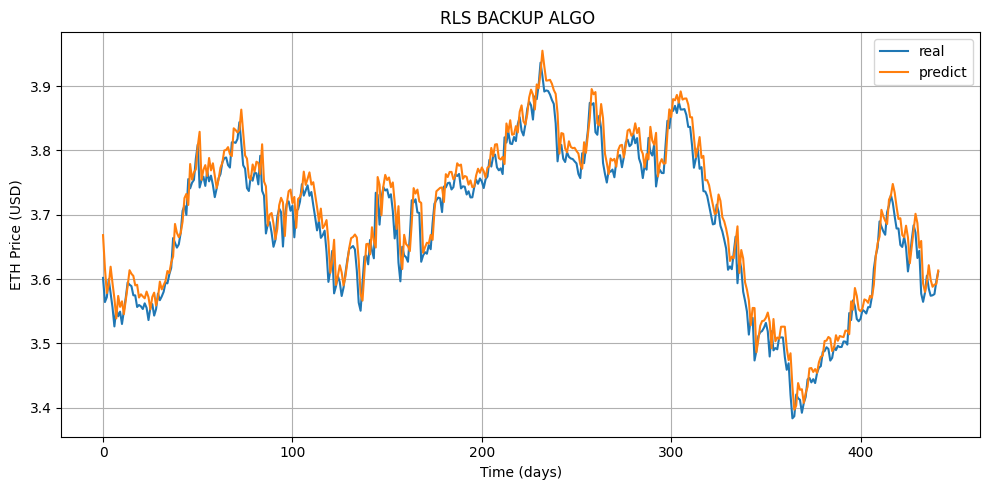

In [55]:
# NLMS
import numpy as np
eta = 0.1
NLMStheta = []

for row, y_t in zip(A_train, y_train):
    row = row.reshape(-1, 1)   
    theta = theta + ((eta * row) * (y_t - row.T @ theta)) / (1 + eta * row.T @ row)

y_pred_test = A_test @ theta

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
print(f"RMSE: {rmse:.4f}")
print(f"R² : {r2:.4f}")
 

# ---- 6) 绘图
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="real")
plt.plot(y_pred_test, label="predict")
plt.title("RLS BACKUP ALGO ")
plt.xlabel("Time (days)")
plt.ylabel('ETH Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()